In [1]:
import io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%cd "D:\Imarticus\stat\medicare dataset"

D:\Imarticus\stat\medicare dataset


In [3]:
medicare=pd.read_csv('MUP_PHY_R23_P05_V10_D21_Geo.csv',low_memory=False)

In [4]:
medicare.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F,279,25735,26341.0,26341,42.415088,20.884538,20.884538,20.815810
1,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O,57563,9080086,9346114.7,9345929,44.186609,25.759089,25.759086,25.205064
2,National,NaN,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,F,187,24576,24649.0,24649,65.965120,31.794918,31.794918,31.521371
3,National,NaN,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O,52326,8897346,8994332.2,8994143,53.747218,35.085090,35.085090,34.497677
4,National,NaN,National,0003A,Fee covid-19 vac 1 booster,N,F,211,5364,5371.0,5371,69.139801,38.653349,38.653349,39.183323


In [5]:
medicare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271635 entries, 0 to 271634
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Rndrng_Prvdr_Geo_Lvl   271635 non-null  object 
 1   Rndrng_Prvdr_Geo_Cd    258353 non-null  object 
 2   Rndrng_Prvdr_Geo_Desc  271635 non-null  object 
 3   HCPCS_Cd               271635 non-null  object 
 4   HCPCS_Desc             271635 non-null  object 
 5   HCPCS_Drug_Ind         271635 non-null  object 
 6   Place_Of_Srvc          271635 non-null  object 
 7   Tot_Rndrng_Prvdrs      271635 non-null  int64  
 8   Tot_Benes              271635 non-null  int64  
 9   Tot_Srvcs              271635 non-null  float64
 10  Tot_Bene_Day_Srvcs     271635 non-null  int64  
 11  Avg_Sbmtd_Chrg         271635 non-null  float64
 12  Avg_Mdcr_Alowd_Amt     271635 non-null  float64
 13  Avg_Mdcr_Pymt_Amt      271635 non-null  float64
 14  Avg_Mdcr_Stdzd_Amt     271635 non-nu

In [6]:
medicare.Rndrng_Prvdr_Geo_Cd.unique()

array([nan, '01', '02', '04', '05', '06', '08', '09', '10', '11', '12',
       '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47',
       '48', '49', '50', '51', '53', '54', '55', '56', '60', '66', '69',
       '72', '78', '9A', '9B', '9C', '9D', '9E'], dtype=object)

In [7]:
medicare.Rndrng_Prvdr_Geo_Cd.isnull().sum()

13282

In [8]:
medicare.Rndrng_Prvdr_Geo_Cd.value_counts(dropna=False)

Rndrng_Prvdr_Geo_Cd
NaN    13282
06      9003
12      8413
48      8202
36      7774
       ...  
9B       195
9C       175
9A       141
69       104
60         3
Name: count, Length: 62, dtype: int64

In [9]:
medicare.Rndrng_Prvdr_Geo_Cd.describe()

count     258353
unique        61
top           06
freq        9003
Name: Rndrng_Prvdr_Geo_Cd, dtype: object

In [10]:
medicare2=medicare

In [11]:
#dropping the 1,3,4 (columns index)
medicare=medicare.drop(['Rndrng_Prvdr_Geo_Cd','HCPCS_Cd','HCPCS_Desc'],axis=1)

In [12]:
medicare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271635 entries, 0 to 271634
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Rndrng_Prvdr_Geo_Lvl   271635 non-null  object 
 1   Rndrng_Prvdr_Geo_Desc  271635 non-null  object 
 2   HCPCS_Drug_Ind         271635 non-null  object 
 3   Place_Of_Srvc          271635 non-null  object 
 4   Tot_Rndrng_Prvdrs      271635 non-null  int64  
 5   Tot_Benes              271635 non-null  int64  
 6   Tot_Srvcs              271635 non-null  float64
 7   Tot_Bene_Day_Srvcs     271635 non-null  int64  
 8   Avg_Sbmtd_Chrg         271635 non-null  float64
 9   Avg_Mdcr_Alowd_Amt     271635 non-null  float64
 10  Avg_Mdcr_Pymt_Amt      271635 non-null  float64
 11  Avg_Mdcr_Stdzd_Amt     271635 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 24.9+ MB


In [13]:
# Avg_Mdcr_Pymt_Amt dependentvariable

In [14]:
medicare.Rndrng_Prvdr_Geo_Lvl.value_counts(dropna=False)

Rndrng_Prvdr_Geo_Lvl
State       258353
National     13282
Name: count, dtype: int64

In [15]:
medicare.Rndrng_Prvdr_Geo_Desc.value_counts(dropna=False)

Rndrng_Prvdr_Geo_Desc
National                              13282
California                             9003
Florida                                8413
Texas                                  8202
New York                               7774
                                      ...  
Armed Forces Europe                     195
Armed Forces Pacific                    175
Armed Forces Central/South America      141
Northern Mariana Islands                104
American Samoa                            3
Name: count, Length: 62, dtype: int64

In [16]:
medicare.HCPCS_Drug_Ind.value_counts()

HCPCS_Drug_Ind
N    259057
Y     12578
Name: count, dtype: int64

In [17]:
medicare.Place_Of_Srvc.value_counts()

Place_Of_Srvc
F    144227
O    127408
Name: count, dtype: int64

In [18]:
medicare.columns

Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Desc', 'HCPCS_Drug_Ind',
       'Place_Of_Srvc', 'Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs',
       'Tot_Bene_Day_Srvcs', 'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt',
       'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt'],
      dtype='object')

In [19]:
#spliting data into num and objects columns
numcols=medicare.select_dtypes(include=np.number)
objcols=medicare.select_dtypes(include=['object'])

In [20]:
print(numcols.shape)
print(objcols.shape)

(271635, 8)
(271635, 4)


In [21]:
numcols.head()

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,279,25735,26341.0,26341,42.415088,20.884538,20.884538,20.815810
1,57563,9080086,9346114.7,9345929,44.186609,25.759089,25.759086,25.205064
2,187,24576,24649.0,24649,65.965120,31.794918,31.794918,31.521371
3,52326,8897346,8994332.2,8994143,53.747218,35.085090,35.085090,34.497677
4,211,5364,5371.0,5371,69.139801,38.653349,38.653349,39.183323


In [22]:
numcols.Tot_Rndrng_Prvdrs.describe()

count    271635.000000
mean        265.619073
std        3245.051853
min           1.000000
25%          12.000000
50%          29.000000
75%          95.000000
max      589381.000000
Name: Tot_Rndrng_Prvdrs, dtype: float64

In [23]:
#check multicollinearity
numcols.corr()

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
Tot_Rndrng_Prvdrs,1.000000,0.685156,0.392200,0.698055,-0.019574,-0.014934,-0.015018,-0.014993
Tot_Benes,0.685156,1.000000,0.479181,0.846001,-0.019822,-0.013196,-0.013083,-0.012996
Tot_Srvcs,0.392200,0.479181,1.000000,0.570929,-0.018037,-0.012290,-0.012242,-0.012142
Tot_Bene_Day_Srvcs,0.698055,0.846001,0.570929,1.000000,-0.014617,-0.009580,-0.009560,-0.009489
Avg_Sbmtd_Chrg,-0.019574,-0.019822,-0.018037,-0.014617,1.000000,0.785956,0.784406,0.775097
Avg_Mdcr_Alowd_Amt,-0.014934,-0.013196,-0.012290,-0.009580,0.785956,1.000000,0.999635,0.996425
Avg_Mdcr_Pymt_Amt,-0.015018,-0.013083,-0.012242,-0.009560,0.784406,0.999635,1.000000,0.996899
Avg_Mdcr_Stdzd_Amt,-0.014993,-0.012996,-0.012142,-0.009489,0.775097,0.996425,0.996899,1.000000


<Axes: >

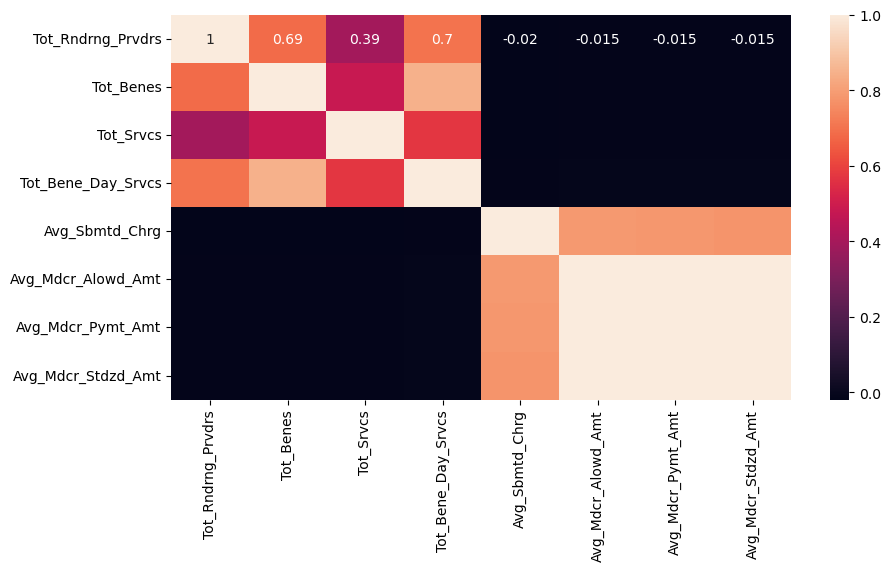

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(numcols.corr(),annot=True)

In [25]:
numcols=numcols.drop(['Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Stdzd_Amt'],axis=1)

In [26]:
numcols.head()

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Pymt_Amt
0,279,25735,26341.0,26341,42.415088,20.884538
1,57563,9080086,9346114.7,9345929,44.186609,25.759086
2,187,24576,24649.0,24649,65.965120,31.794918
3,52326,8897346,8994332.2,8994143,53.747218,35.085090
4,211,5364,5371.0,5371,69.139801,38.653349


C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

<Axes: >

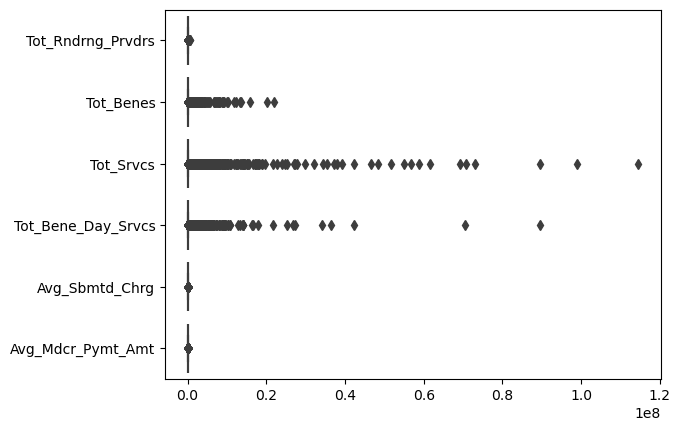

In [27]:
#data scaling in numcols
sns.boxplot(numcols,orient='h')

In [28]:
from sklearn.preprocessing import RobustScaler

In [29]:
robust=RobustScaler()

In [30]:
numcols_robust=robust.fit_transform(numcols)

In [31]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

<Axes: >

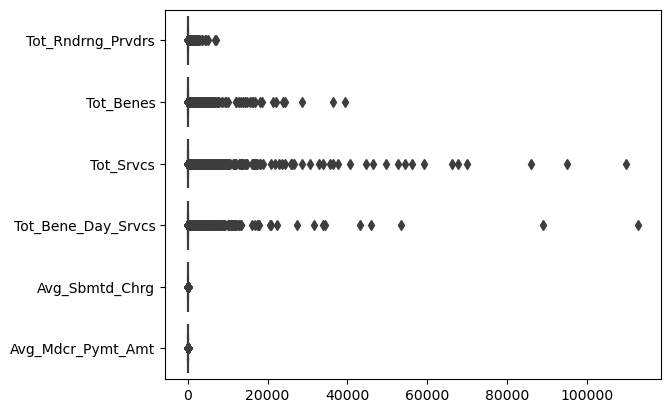

In [32]:
sns.boxplot(numcols_robust,orient='h')

In [33]:
y=numcols.Avg_Mdcr_Pymt_Amt
numcols=numcols.drop('Avg_Mdcr_Pymt_Amt',axis=1)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
minmax=MinMaxScaler()

In [36]:
numcols_minmax=minmax.fit_transform(numcols)

In [37]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

<Axes: >

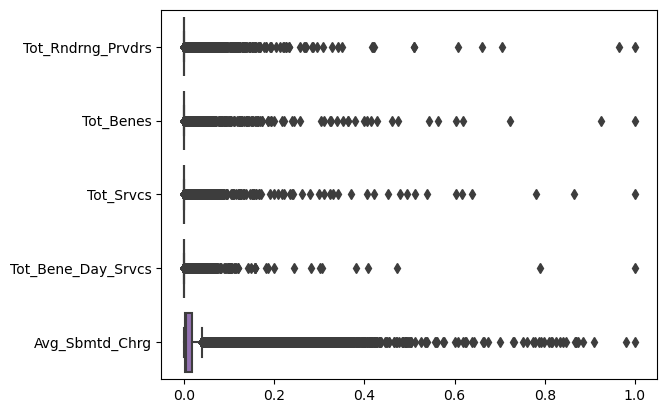

In [38]:
sns.boxplot(numcols_minmax,orient='h')

In [39]:
#dummyncode object cols
objcols_dummy=pd.get_dummies(objcols)

In [40]:
medicare_df=pd.concat([numcols_minmax,objcols_dummy],axis=1)

In [41]:
medicare_df.head()

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Rndrng_Prvdr_Geo_Lvl_National,Rndrng_Prvdr_Geo_Lvl_State,Rndrng_Prvdr_Geo_Desc_Alabama,Rndrng_Prvdr_Geo_Desc_Alaska,Rndrng_Prvdr_Geo_Desc_American Samoa,...,Rndrng_Prvdr_Geo_Desc_Virgin Islands,Rndrng_Prvdr_Geo_Desc_Virginia,Rndrng_Prvdr_Geo_Desc_Washington,Rndrng_Prvdr_Geo_Desc_West Virginia,Rndrng_Prvdr_Geo_Desc_Wisconsin,Rndrng_Prvdr_Geo_Desc_Wyoming,HCPCS_Drug_Ind_N,HCPCS_Drug_Ind_Y,Place_Of_Srvc_F,Place_Of_Srvc_O
0,0.000472,0.001175,0.000230,0.000294,0.000451,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0.097665,0.414787,0.081602,0.104404,0.000470,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,0.000316,0.001122,0.000215,0.000275,0.000702,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.088780,0.406439,0.078531,0.100474,0.000572,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,0.000356,0.000245,0.000047,0.000060,0.000736,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [42]:
#EDA
medicare.Tot_Rndrng_Prvdrs.describe()

count    271635.000000
mean        265.619073
std        3245.051853
min           1.000000
25%          12.000000
50%          29.000000
75%          95.000000
max      589381.000000
Name: Tot_Rndrng_Prvdrs, dtype: float64

In [43]:
medicare.Tot_Benes.describe()

count    2.716350e+05
mean     5.675854e+03
std      1.182706e+05
min      1.100000e+01
25%      3.000000e+01
50%      1.060000e+02
75%      5.850000e+02
max      2.189095e+07
Name: Tot_Benes, dtype: float64

In [44]:
medicare.Tot_Srvcs.describe()

count    2.716350e+05
mean     2.323802e+04
std      6.054120e+05
min      1.100000e+01
25%      4.000000e+01
50%      1.610000e+02
75%      1.084000e+03
max      1.145324e+08
Name: Tot_Srvcs, dtype: float64

In [45]:
medicare.Tot_Benes.describe()

count    2.716350e+05
mean     5.675854e+03
std      1.182706e+05
min      1.100000e+01
25%      3.000000e+01
50%      1.060000e+02
75%      5.850000e+02
max      2.189095e+07
Name: Tot_Benes, dtype: float64

<Axes: ylabel='count'>

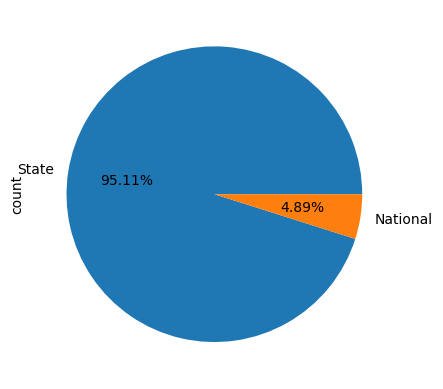

In [46]:
#pie 
medicare.Rndrng_Prvdr_Geo_Lvl.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

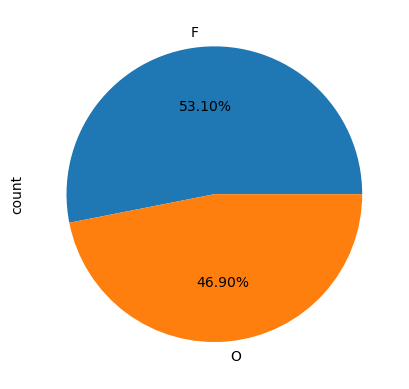

In [47]:
medicare.Place_Of_Srvc.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='count'>

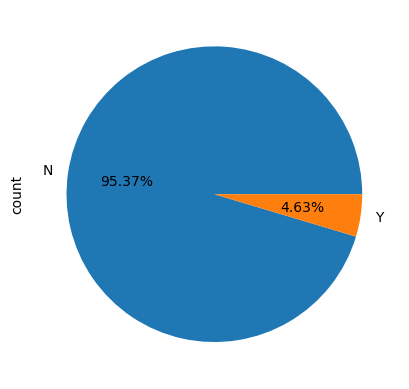

In [48]:
medicare.HCPCS_Drug_Ind.value_counts().plot(kind='pie',autopct='%0.2f%%')

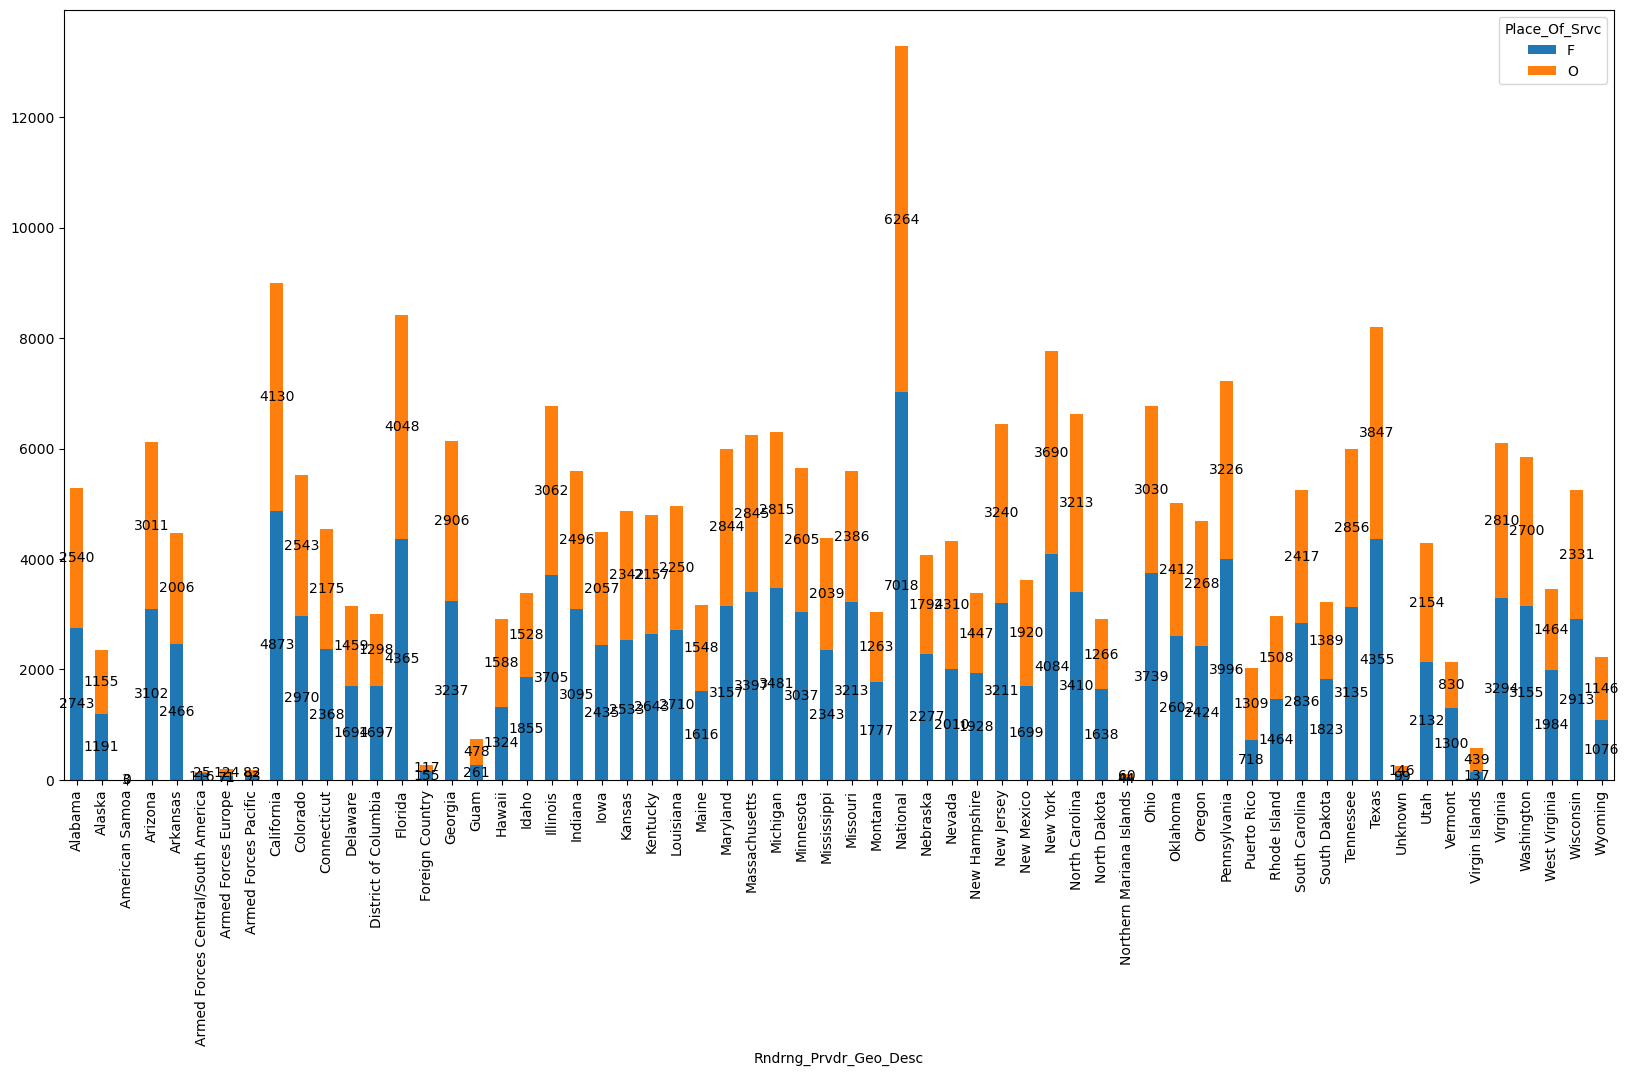

In [49]:
# stacked bar
ax=pd.crosstab(medicare.Rndrng_Prvdr_Geo_Desc,medicare.Place_Of_Srvc).plot(kind='bar',stacked=True,figsize=(20,10))
for i in ax.containers:
    ax.bar_label(i,label_type='center',fontsize=10)

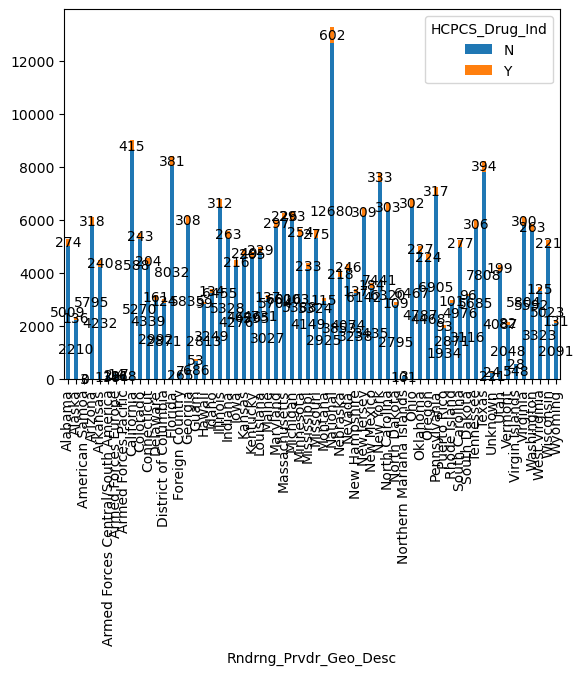

In [50]:
ax=pd.crosstab(medicare.Rndrng_Prvdr_Geo_Desc,medicare.HCPCS_Drug_Ind).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i,label_type='center') # or edge

In [51]:
#Barplots
medicare.Tot_Benes.groupby(medicare.Rndrng_Prvdr_Geo_Desc).mean()

Rndrng_Prvdr_Geo_Desc
Alabama           2692.708120
Alaska             460.328218
American Samoa      48.000000
Arizona           3260.426305
Arkansas          1840.671735
                     ...     
Virginia          3314.207733
Washington        2516.915798
West Virginia     1040.517111
Wisconsin         2397.131198
Wyoming            545.293429
Name: Tot_Benes, Length: 62, dtype: float64

<Axes: xlabel='Rndrng_Prvdr_Geo_Desc'>

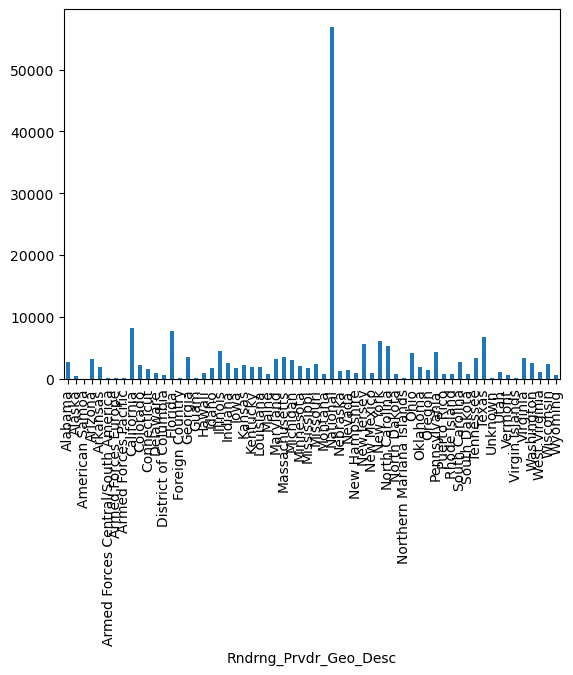

In [52]:
medicare.Tot_Benes.groupby(medicare.Rndrng_Prvdr_Geo_Desc).mean().plot(kind='bar')

In [53]:
medicare.Tot_Bene_Day_Srvcs.groupby(medicare.Rndrng_Prvdr_Geo_Desc).mean()

Rndrng_Prvdr_Geo_Desc
Alabama           4818.574484
Alaska             822.216539
American Samoa      50.333333
Arizona           6153.820874
Arkansas          3363.869410
                     ...     
Virginia          6108.615662
Washington        4364.945517
West Virginia     1887.297854
Wisconsin         3874.225782
Wyoming           1077.861386
Name: Tot_Bene_Day_Srvcs, Length: 62, dtype: float64

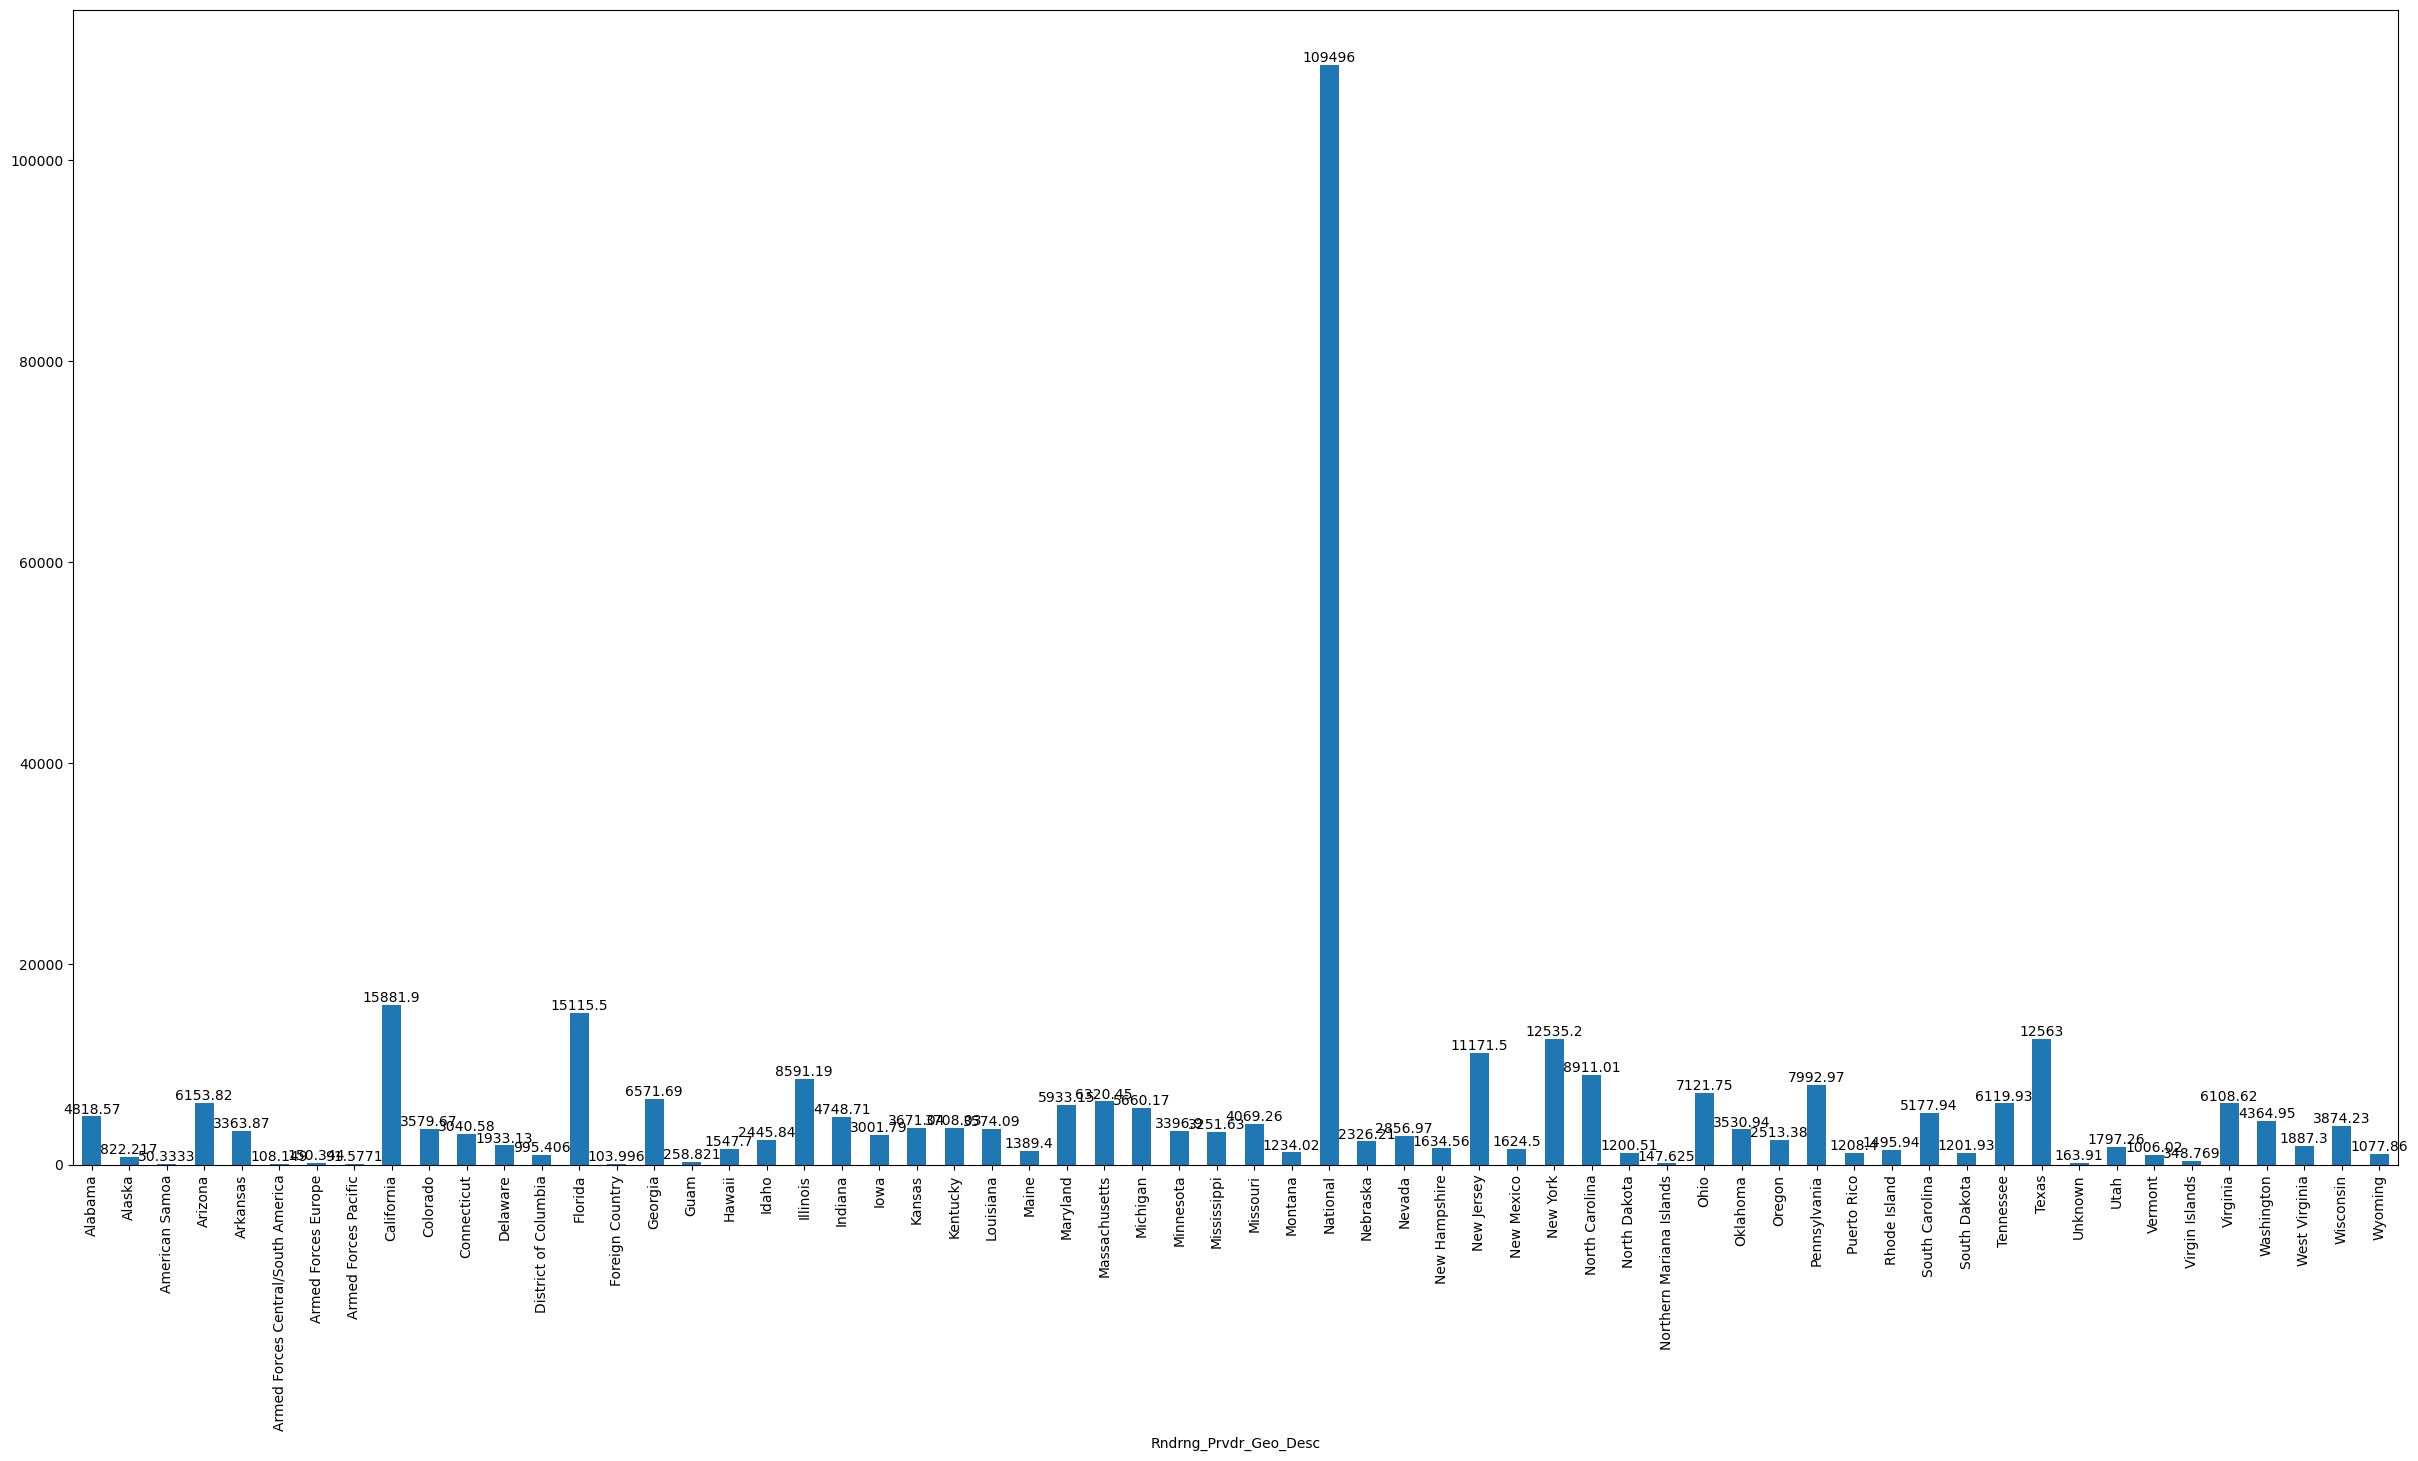

In [54]:
plt.figure(figsize=(30,15))
ax=medicare.Tot_Bene_Day_Srvcs.groupby(medicare.Rndrng_Prvdr_Geo_Desc).mean().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,label_type='edge')

In [55]:
# Hypothesis testing
medicare.Avg_Mdcr_Pymt_Amt.groupby(medicare.Place_Of_Srvc).mean()

Place_Of_Srvc
F    295.256312
O    172.634904
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

In [56]:
f=medicare[medicare.Place_Of_Srvc=='F']
o=medicare[medicare.Place_Of_Srvc=='O']

In [57]:
from scipy.stats import ttest_ind

In [58]:
ttest_ind(f.Avg_Mdcr_Pymt_Amt,o.Avg_Mdcr_Pymt_Amt,equal_var=False)
#since  pvalue=0.0 is less than 0.05,Reject Null

#  At 95% confidence level, Alternative Hypothsis True ,there is no significant difference between Avg_Mdcr_Pymt_Amt and Place_Of_Srvc ( pvalue=0.0).

TtestResult(statistic=48.558770250734874, pvalue=0.0, df=186370.35491947332)

In [59]:
ttest_ind(f.Tot_Bene_Day_Srvcs,o.Tot_Bene_Day_Srvcs,equal_var=False)
#since  pvalue=1.6883057820780268e-23 is less than 0.05,Reject Null

TtestResult(statistic=-9.991472239116112, pvalue=1.6883057820780268e-23, df=155563.7839138749)

In [60]:
medicare.Avg_Mdcr_Pymt_Amt.groupby(medicare.Rndrng_Prvdr_Geo_Lvl).mean()

Rndrng_Prvdr_Geo_Lvl
National    333.321047
State       232.828068
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

In [61]:
national=medicare[medicare.Rndrng_Prvdr_Geo_Lvl=='National']
state=medicare[medicare.Rndrng_Prvdr_Geo_Lvl=='State']

In [62]:
ttest_ind(national.Avg_Mdcr_Pymt_Amt,state.Avg_Mdcr_Pymt_Amt,equal_var=False)
#since  pvalue=1.3002203261744678e-63 is less than 0.05,Reject Null

TtestResult(statistic=16.920026237030118, pvalue=1.3002203261744678e-63, df=14536.3966327008)

In [63]:
ttest_ind(national.Tot_Srvcs,state.Tot_Srvcs,equal_var=False)
#since  ppvalue=2.0538020313171456e-23 is less than 0.05,Reject Null

TtestResult(statistic=9.989278714308888, pvalue=2.0538020313171456e-23, df=13285.111905354746)

In [64]:
from scipy.stats import chi2_contingency

In [65]:
chi2_contingency(pd.crosstab(medicare.Rndrng_Prvdr_Geo_Desc,medicare.Place_Of_Srvc))
#since  ppvalue=8.877146268627805e-238 is less than 0.05,Reject Null

Chi2ContingencyResult(statistic=1329.3037975195648, pvalue=8.877146268627805e-238, dof=61, expected_freq=array([[2.80505546e+03, 2.47794454e+03],
       [1.24562940e+03, 1.10037060e+03],
       [1.59287647e+00, 1.40712353e+00],
       [3.24575129e+03, 2.86724871e+03],
       [2.37444786e+03, 2.09755214e+03],
       [7.48651941e+01, 6.61348059e+01],
       [1.03536971e+02, 9.14630294e+01],
       [9.29177941e+01, 8.20822059e+01],
       [4.78022229e+03, 4.22277771e+03],
       [2.92717599e+03, 2.58582401e+03],
       [2.41214593e+03, 2.13085407e+03],
       [1.67411317e+03, 1.47888683e+03],
       [1.59022168e+03, 1.40477832e+03],
       [4.46695658e+03, 3.94604342e+03],
       [1.44420800e+02, 1.27579200e+02],
       [3.26168005e+03, 2.88131995e+03],
       [3.92378571e+02, 3.46621429e+02],
       [1.54615209e+03, 1.36584791e+03],
       [1.79623370e+03, 1.58676630e+03],
       [3.59299836e+03, 3.17400164e+03],
       [2.96859078e+03, 2.62240922e+03],
       [2.38506703e+03, 2.10693297

In [66]:
chi2_contingency(pd.crosstab(medicare.Rndrng_Prvdr_Geo_Desc,medicare.HCPCS_Drug_Ind))
#since  ppvalue=82.0847341858677072e-16 is less than 0.05,Reject Null

Chi2ContingencyResult(statistic=198.1620393612475, pvalue=2.0847341858677072e-16, dof=61, expected_freq=array([[5.03837183e+03, 2.44628174e+02],
       [2.23736898e+03, 1.08631023e+02],
       [2.86108565e+00, 1.38914352e-01],
       [5.82993886e+03, 2.83061145e+02],
       [4.26492501e+03, 2.07074994e+02],
       [1.34471025e+02, 6.52897454e+00],
       [1.85970567e+02, 9.02943288e+00],
       [1.66896663e+02, 8.10333720e+00],
       [8.58611803e+03, 4.16881970e+02],
       [5.25772173e+03, 2.55278274e+02],
       [4.33263737e+03, 2.10362634e+02],
       [3.00700102e+03, 1.45998984e+02],
       [2.85631717e+03, 1.38682828e+02],
       [8.02343785e+03, 3.89562148e+02],
       [2.59405099e+02, 1.25949012e+01],
       [5.85854971e+03, 2.84450288e+02],
       [7.04780765e+02, 3.42192354e+01],
       [2.77716047e+03, 1.34839531e+02],
       [3.22635092e+03, 1.56649084e+02],
       [6.45365553e+03, 3.13344473e+02],
       [5.33210995e+03, 2.58890047e+02],
       [4.28399891e+03, 2.08001090e

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Figure size 2000x1000 with 0 Axes>

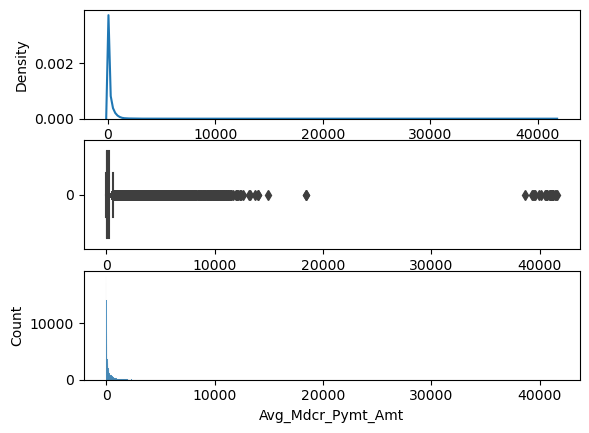

In [67]:
#box,hist,hist
plt.figure(figsize=(20,10))
fig,ax=plt.subplots(3,1)
sns.kdeplot(y,ax=ax[0])
sns.boxplot(y,orient='h',ax=ax[1])
sns.histplot(y,ax=ax[2])
plt.show()

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: di

<Figure size 2000x1000 with 0 Axes>

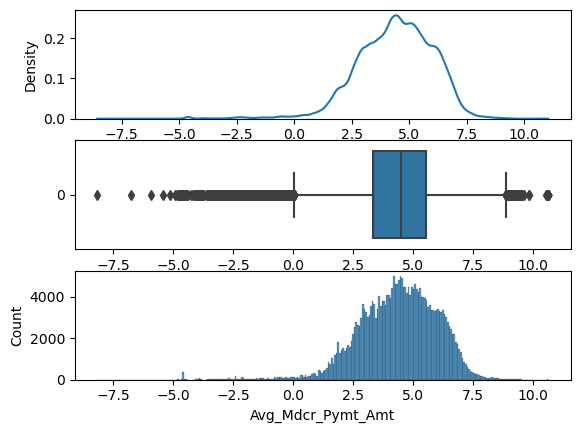

In [68]:
#box,hist,hist
plt.figure(figsize=(20,10))
fig,ax=plt.subplots(3,1)
sns.kdeplot(np.log(y),ax=ax[0])
sns.boxplot(np.log(y),orient='h',ax=ax[1])
sns.histplot(np.log(y),ax=ax[2])
plt.show()

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Figure size 2000x1000 with 0 Axes>

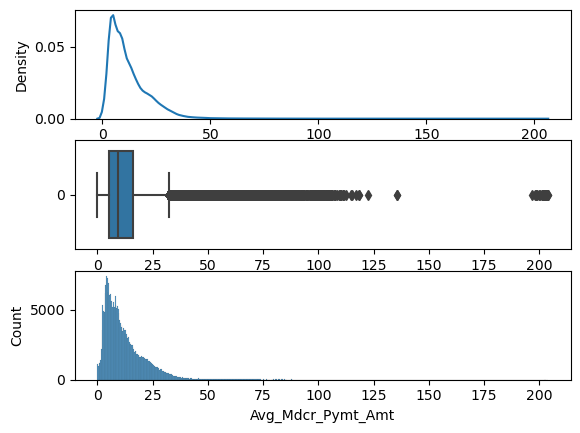

In [69]:
#box,hist,hist
plt.figure(figsize=(20,10))
fig,ax=plt.subplots(3,1)
sns.kdeplot(np.sqrt(y),ax=ax[0])
sns.boxplot(np.sqrt(y),orient='h',ax=ax[1])
sns.histplot(np.sqrt(y),ax=ax[2])
plt.show()

In [70]:
# build multiple linear regression, decision Tree

In [71]:
X=medicare_df

In [72]:
X.head()

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Rndrng_Prvdr_Geo_Lvl_National,Rndrng_Prvdr_Geo_Lvl_State,Rndrng_Prvdr_Geo_Desc_Alabama,Rndrng_Prvdr_Geo_Desc_Alaska,Rndrng_Prvdr_Geo_Desc_American Samoa,...,Rndrng_Prvdr_Geo_Desc_Virgin Islands,Rndrng_Prvdr_Geo_Desc_Virginia,Rndrng_Prvdr_Geo_Desc_Washington,Rndrng_Prvdr_Geo_Desc_West Virginia,Rndrng_Prvdr_Geo_Desc_Wisconsin,Rndrng_Prvdr_Geo_Desc_Wyoming,HCPCS_Drug_Ind_N,HCPCS_Drug_Ind_Y,Place_Of_Srvc_F,Place_Of_Srvc_O
0,0.000472,0.001175,0.000230,0.000294,0.000451,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0.097665,0.414787,0.081602,0.104404,0.000470,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,0.000316,0.001122,0.000215,0.000275,0.000702,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.088780,0.406439,0.078531,0.100474,0.000572,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,0.000356,0.000245,0.000047,0.000060,0.000736,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [73]:
medicare2.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F,279,25735,26341.0,26341,42.415088,20.884538,20.884538,20.815810
1,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O,57563,9080086,9346114.7,9345929,44.186609,25.759089,25.759086,25.205064
2,National,NaN,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,F,187,24576,24649.0,24649,65.965120,31.794918,31.794918,31.521371
3,National,NaN,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O,52326,8897346,8994332.2,8994143,53.747218,35.085090,35.085090,34.497677
4,National,NaN,National,0003A,Fee covid-19 vac 1 booster,N,F,211,5364,5371.0,5371,69.139801,38.653349,38.653349,39.183323


In [74]:
medicaretxt=medicare2.HCPCS_Desc

In [75]:
medicaretxt.head()

0    Adm sarscov2 30mcg/0.3ml 1st
1    Adm sarscov2 30mcg/0.3ml 1st
2    Adm sarscov2 30mcg/0.3ml 2nd
3    Adm sarscov2 30mcg/0.3ml 2nd
4      Fee covid-19 vac 1 booster
Name: HCPCS_Desc, dtype: object

In [76]:
medicaretxt=medicaretxt.str.lower()

In [78]:
medicaretxt.head()

0    adm sarscov2 30mcg/0.3ml 1st
1    adm sarscov2 30mcg/0.3ml 1st
2    adm sarscov2 30mcg/0.3ml 2nd
3    adm sarscov2 30mcg/0.3ml 2nd
4      fee covid-19 vac 1 booster
Name: HCPCS_Desc, dtype: object

In [79]:
import re

In [80]:
def clean_txt(text):
    return ' '.join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",text).split())

In [81]:
medicaretxt=[str(clean_txt(X)) for X in medicaretxt]

In [82]:
medicare_txt=pd.DataFrame(medicaretxt,columns=['HCPCS_Desc'])

In [83]:
medicare_txt.head()

,HCPCS_Desc
0,adm sarscov mcg ml st
1,adm sarscov mcg ml st
2,adm sarscov mcg ml nd
3,adm sarscov mcg ml nd
4,fee covid vac booster


In [84]:
import nltk
from nltk.corpus import stopwords

In [85]:
stop_words=set(stopwords.words('english')) # define Stope words

In [86]:
medicare_words=medicare_txt.HCPCS_Desc.str.split()

In [87]:
from wordcloud import WordCloud

In [89]:
wordcloud=WordCloud(width=1000,height=500,colormap='plasma').generate(str(medicare_txt))

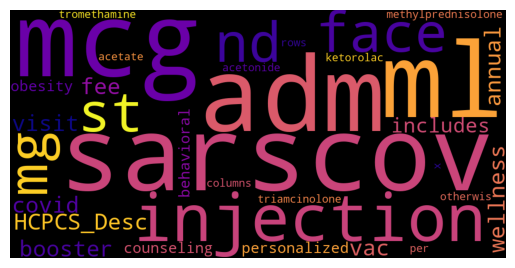

In [90]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [99]:
medicare_words=medicare_words.map(' '.join)

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [126]:
tfidf=TfidfVectorizer(max_features=300,stop_words='english',ngram_range=(2,2))

In [127]:
nlp_tfidf=tfidf.fit_transform(medicare_words)

In [128]:
pd.DataFrame(nlp_tfidf.toarray(),columns=tfidf.vocabulary_).head()

,anesthesia procedure,using endoscope,soft tissue,gene analysis,ray imaging,blood vessel,brain spinal,spinal cord,needle biopsy,blood vessels,...,visit total,total time,time minutes,inpatient care,facility visit,visit typically,care management,management services,calendar month,home health
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
nlp_tfidf=pd.DataFrame(nlp_tfidf.toarray(),columns=tfidf.vocabulary_)

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
regmodel=LinearRegression().fit(nlp_tfidf,y)

In [132]:
regmodel.score(nlp_tfidf,y)

0.1213449159493244

In [133]:
regpredict=regmodel.predict(nlp_tfidf)

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
cross_val_score(regmodel,nlp_tfidf,y)

KeyboardInterrupt: 

In [ ]:
np.mean([0.10559063, 0.13284818, 0.09908757, 0.13202635, 0.13566561])

In [112]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
treemodel=DecisionTreeRegressor().fit(nlp_tfidf,y)

In [116]:
treemodel.score(nlp_tfidf,y)

0.1673965376121015

In [136]:
X_tfidf=pd.concat([X,nlp_tfidf],axis=1)

In [137]:
X_tfidf.shape

(271635, 373)

In [138]:
regmodel2=LinearRegression().fit(X_tfidf,y)

In [139]:
regmodel2.score(X_tfidf,y)

0.6423727269059212

In [144]:
cross_val_score(regmodel2,X_tfidf,y)

array([-5.48723761e+24, -1.07926504e+22, -3.05061951e+23, -3.69104918e+23,
       -1.76964927e+22])

In [146]:
np.mean([-5.48723761e+24, -1.07926504e+22, -3.05061951e+23, -3.69104918e+23,
       -1.76964927e+22])

-1.2379787244200001e+24

In [159]:
tree=DecisionTreeRegressor()

In [160]:
treemodel=tree.fit(X_tfidf,y)

In [161]:
treemodel.score(X_tfidf,y)

0.9999979782058384

In [162]:
cross_val_score(tree,X_tfidf,y)

array([0.14835211, 0.17569041, 0.13652489, 0.18159571, 0.19141824])

In [ ]:
np.mean

In [151]:
np.mean([0.08549352, 0.11888858, 0.08851024, 0.1159193 , 0.11239951])

0.10424223000000002

In [147]:
np.mean([0.07669244, 0.10916688, 0.08039993, 0.10330241, 0.10675899])

0.09526413

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

In [164]:
gbm=GradientBoostingRegressor()

In [166]:
gbmmodel=gbm.fit(X_tfidf,y)

In [167]:
gbm.score(X_tfidf,y)

0.8907301025873543

In [168]:
cross_val_score(gbm,X_tfidf,y)

array([0.84279691, 0.89470977, 0.88218803, 0.87533828, 0.83531463])

In [169]:
from sklearn.neighbors import KNeighborsRegressor

In [170]:
knn=KNeighborsRegressor()

In [171]:
knnmodel=knn.fit(X_tfidf,y)

In [172]:
knn.score(X_tfidf,y)

0.5929212852358632